# 1. String Manipulation Methods (READ-AND-PLAY)

In [1]:
# Run this code
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

In [ ]:
# Run this code
string = '    pen,pineapple,apple, pen   '
print(string)

`split()` method 

- split a string into a list where each word is a list item
- we specify the `separator` to use when splitting the string
- we can specifies how many splits to do by setting `maxsplit` parameter

In [ ]:
# Split the string using separator ','
string.split(',')

In [ ]:
# Run this code
string_2 = 'summer#autumn   #spring  # winter'
print(string_2)

In [ ]:
# Split the string using separator '#'
string_2.split('#')

In [ ]:
# Split string_2 and set the maxsplit parameter to 2 (this should return a list with 3 elements)
x = string_2.split('#', 2)
print(x)

`strip()` method

- it removes whitespaces at the beginning and at the end of the string

In [ ]:
# Remove whitespaces in the variable our_string
our_string = '     There is a lot of space at the beginning and at the end of this sentence, let`s remove it.       '
our_result = our_string.strip()
print(our_result)

`join()` method

- this method takes all items in an iterable and joins them into one string 

In [ ]:
# Run this code
my_list = ['Please', 'join', 'these', 'items.']
'_'.join(my_list)

In [ ]:
# Run this code
my_tuple = ('We','are', 'joining', 'again.')
'-'.join(my_tuple)

In the case of a dictionary, `join()` tries to join keys of the dictionary, not values.

In [ ]:
# Run this code
my_dictionary = {'Key_1':'1',
                 'Key_2':'2'}
'#'.join(my_dictionary)

`index()`

- returns position of first character in substring if found in the string
- Raises `ValueError` if not found

In [ ]:
# Run this code
string_3 = 'That is my string'

In [ ]:
# Find the position of 'm' using `index()`
string_3.index('m')

`find()`

- returns position of first character of first occurence of substring in the string
- this method is like `index()`, but returns -1 if not found

In [ ]:
# Find the position of 'g' using `find()`
string_3.find('g')

`replace()`

- replace occurences of string with another string
- commonly used to remove characters by passing an empty string

In [ ]:
# Replacing string in string_3
string_3.replace('is','was')

In [ ]:
# Run this code
string_4 = 'Why is here a semicolon; ?'

In [ ]:
# Replacing character
string_4.replace(';','')

In [ ]:
# Run this code
string_5 = 'Banana, avocado, pineapple, artichoke'

In [ ]:
# TASK 1 >>>> Use .replace() method to replace 'a' with 'A' in string_5 and store it in variable result_1


`upper()` method

- converts all lowercase characters in a string into uppercase characters and returns it

`lower()` method
- converts all uupercase characters in a string into lowercase characters and returns it

In [ ]:
# Run this code
string_to_upper = "Make this uppercase"
print(string_to_upper.upper())

In [ ]:
# Run this code
string_to_lower = 'THIS SHOULD BE ALL LOWERCASE'
print(string_to_lower.lower())

# 2. Project: Cleaning Column Names

In [ ]:
# Import pandas library
import pandas as pd
data = pd.read_csv('Datasets/avocado.csv')

If we take a look at the column names, we can notice that these needs some cleaning, such as removing the whitespaces. Some systems and data pipelines can have issues with these.

In [ ]:
# Run this code
data_2015 = data[data['year'] == 2015]
data_2015.columns

Let's use lambda for that and three of the functions which we just learned - strip, lower and replace.

In [ ]:
# Run this code
data_2015.rename(columns = lambda x: x.strip().lower().replace(' ','_'), inplace = True)

In [ ]:
# Run this code
data_2015.head()

One column is still ugly. It would not be worth it to attempt and write specific function for it. We address it manually via dictionary.

In [ ]:
# BONUS TASK - Hints: use .rename() method and specify columns through dictionary, i.e. 'column_name_to_clean':'new_column_name'
#                   specify inplace = True

# 3. Cleaning Text Column (READ-ONLY)

Imagine we have 2 possible categories of avocado (A and B) in the same row for the same day that separated with '/'. 
It would be an issue for us if we'd like to explore and visualize data based on the avocado's category. 

We can use `str.split()` method to resolve this issue in few steps.

In [ ]:
# Run this code - don't worry what it does
data_avo = {'day':'Monday',
            'category':'A/B',
            'type':'organic'}
monday_data = pd.DataFrame(data_avo, range(10))           

Let's now examine the special altered dataset which we created. You will notice that in the 'category' column. we have A and B symbols. These represent avocado types, which means that in **every row we have stored 2 observations**. That is not good and we need to split each row into 2 separate rows.

In [ ]:
# Run this code
monday_data

At first, we use split method to create a list of two objects out of the original element in the column. Take a look.

In [ ]:
# Firstly, split the 'category' column with separator '/'
monday_data['category'] = monday_data['category'].str.split('/')
monday_data

The upcoming step is hard, try to follow.
- next we use `apply()` function on `monday_data` that return Series: use lambda function `lambda x:` to create new Series - we also need to specify axis = 1 which return a new column for avocado's type
- after the `apply()` part add `stack()` - to stack avocado's category 

In [ ]:
# Run this code
series_2 = monday_data.apply(lambda x: pd.Series(x['category']), axis = 1).stack()

As you can see below, **categories are now separated into new rows**: 10 observation for Monday. However there is also new level (another index) for A and B that we don't need anymore. 

In [ ]:
# Run this code
series_2

We can remove this index using `reset_index()`: 
- use `drop = True`
- set `level = 1`

In [ ]:
# Run this code
series_2 = monday_data.apply(lambda x: pd.Series(x['category']), axis = 1).stack().reset_index(level = 1, drop = True)

- give the Series (it will be a new column) a name 'avocado_category'

In [ ]:
# Run this code
series_2.name = 'avocado_category' 

- drop the column 'category' from `new_data` (this is the column that contain A/B), set axis = 1
- join `series_2` where we have separated categories

In [ ]:
# Run this code
new_data = monday_data.drop('category', axis = 1).join(series_2)

In [ ]:
# Run this code
new_data

# 4. Project: Cleaning Text Column

In [ ]:
# Run the code
import numpy as np
data_1 = pd.read_csv('Datasets/movie_metadata.csv')
movie_data = data_1.iloc[:,np.r_[1:3, 8:13]]

In [ ]:
# Display first 5 rows of movie_data and look at the genres column
movie_data.head()

Now we use the same way to split genres of movies, the only difference is the separator '|'.

In [ ]:
# TASK MUST DO Split the 'genres' column with separator '/'
movie_data.genres = movie_data.genres.str.split('|')

In [ ]:
# Create a new Series for genres using lambda function and apply it to movie_data
series_genres = movie_data.apply(lambda x: pd.Series(x['genres']), axis = 1).stack().reset_index(level = 1,drop = True)

In [ ]:
# Print the new Series
print(series_genres)

In [ ]:
# Give the Series (new column) name 'genre'
series_genres.name = 'genre'

In [ ]:
# TASK 2 >>>> Drop the old column 'genres' from movie_data on axis = 1
#             Join new Series 'series_genres'
 

In [ ]:
# Run this code
print(our_movie_data)

# 5. Regular expressions

- provide a flexible way to serach or match string patterns in text
- a single expression, commonly called a **regex**, is a string formed according to the regular expression language

- using built-in module `re` we can apply regular expressions to strings

Run the following cell showing example of regular expression for validating an email $^{1}$. 

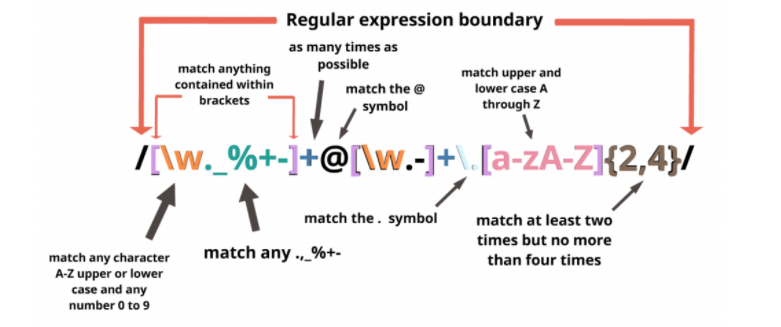

In [2]:
# Run this code
Image('Images/regex.png')

In [ ]:
# Import re module
import re

Regex Methods

There is a set of methods that allows us to search a string for a match such as:

`findall`
- returns a list that contain all matches

`match`
- if zero or more characters at the beginning of string match this regular expression, return a corresponding match object

`search`
- scan through string looking for the first location where regular expression produces a match and return a corresponding match object

`split`
- breaks string into pieces at each occurence of pattern

In [ ]:
# Split string called 'sentence' by whitespaces 
sentence = 'This  sentence contains     whitespace'

To split this string we need to call `re.split()`. 

Within this method we specify regex `'\s+'` describing one ore more whitespace character and string to split (in our case 'sentence').

Firstly, the regex is complied and then the split function is called on the passed string.

In [ ]:
# Run this code
re.split('\s+', sentence)

With `re.compile()` we can combine a regular expression pattern into pattern objects, which can be used for pattern matching
- this approach is recommended if you intend to apply the same expression to many strings 

In [ ]:
# Run this code
our_regex = re.compile('\s+')

In [ ]:
# Split string 'sentence' using regex object 'our_regex'
our_regex.split(sentence)

In [ ]:
# Get the list of all patterns that match regex using findall() method
our_regex.findall(sentence)

In [ ]:
# Create regex object that match pattern contain 'e'
another_regex = re.compile('e')

In [ ]:
# Run the code
sentence_2 = 'Learning RegEx is fun'

In [ ]:
# Return the list that contain all matches in string 'sentence_2'
another_regex.findall(sentence_2)

As you can see, the regex object performed case-sensitive matching and matched lowercase letters only. 

We can also define case insensitive regex object during the pattern compile using `flags = re.IGNORECASE`

In [ ]:
# Create regex object that is not case sensitive using re.IGNORECASE
regex_sensitive = re.compile('e', flags = re.IGNORECASE)

In [ ]:
# Run this code
regex_sensitive.findall(sentence_2)

In [ ]:
text = 'Regex, Regex pattern, Expressions'
# Create regex object that match pattern contain 's'
pattern = re.compile('s')

In [ ]:
# Check for a match anywhere in the string using .search()
pattern.search(text)

As you can see `search` returns only the start and end position of the pattern.

In [ ]:
# Check for a match only at the beginning of the string using .match()
pattern.match(text)

In [ ]:
# Run this line of code
email = 'Email addresses of our two new employees are first.example@gmail.com and second_example@gmail.com'

In [ ]:
# Write a regex to match email addresses
email_pattern = r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+'

In [ ]:
# Create a regex object that match email addresses and make it case-insensitive
rege = re.compile(email_pattern, flags = re.IGNORECASE)

In [ ]:
# Get list of email addresses from 'email' string
rege.findall(email)

In [ ]:
# Search for the position of the first email address in the string 'email'
rege.search(email)

In [ ]:
text = 'The average price of the avocados was $1.35 last year, hopefully, this year the price don`t exceed $1.50 for a piece!'

In [ ]:
# TASK 3 >>>> Google for Regex patern to match decimal numbers and assign it to variable decimal_number


In [ ]:
# Regex object that match decimal number - won't work if TASK 3 is not completed
pattern_dec = re.compile(decimal_number)

In [ ]:
# Run this code - won't work if TASK 3 is not completed
pattern_dec.findall(text)

**Hint**

If we want to find some pattern (decimal numbers for example) within the string of Series, we can also use pandas function `str.contains`. For more information check [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html).

# Appendix

Data Source 1: https://www.kaggle.com/neuromusic/avocado-prices

License: Database: Open Database, Contents: Â© Original Authors


Data source 2: https://www.kaggle.com/orgesleka/imdbmovies

License: CC0: Public Domain

# References

$^{1}$ BreatheCode. 2017. Regex Tutorial. [ONLINE] Available at: https://content.breatheco.de/en/lesson/regex-tutorial-regular-expression-examples. [Accessed 14 September 2020].

pandas. pandas.Series.str.contains. [ONLINE] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html. [Accessed 14 September 2020].